# Natural Language Processing

## Imdb reviews classification using subwords method

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
imdb, info = tfds.load('imdb_reviews/subwords8k', with_info = True, as_supervised = True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteQRBGQ7/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteQRBGQ7/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteQRBGQ7/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


### Seperating the Training and Testing Data

In [2]:
train_data, test_data = imdb['train'], imdb['test']

### Using the Tokenizer preset provided to us with the dataset



In [4]:
tokenizer = info.features['text'].encoder

In [5]:
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

### Encoding and Decoding 

In [9]:
sample_string = 'Tensorflow, from basics to mastery'

tokenized_string = tokenizer.encode(sample_string)
print(tokenized_string)

original_string = tokenizer.decode(tokenized_string)
print(original_string)

[6307, 2327, 2934, 2, 48, 4249, 4429, 7, 2652, 8050]
Tensorflow, from basics to mastery


In [12]:
for ts in tokenized_string:
  print('{} ----> {}'. format(ts, tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
2934 ----> flow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
2652 ----> master
8050 ----> y


In [13]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_data.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_data.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_data))

In [15]:
embedding_dim = 64
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(tokenizer.vocab_size, embedding_dim),
                                    #tf.keras.layres.Bidirectional(tf.keras.layersLSTM(64)),
                                    tf.keras.layers.GlobalAveragePooling1D(),
                                    tf.keras.layers.Dense(6, activation = 'relu'),
                                    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [23]:
num_epochs= 5
model.compile(loss= 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(train_dataset, epochs= num_epochs, validation_data = test_dataset)

Epoch 1/5
391/391 [==============================] - 15s 39ms/step - loss: 0.1801 - accuracy: 0.9370 - val_loss: 0.3143 - val_accuracy: 0.8781
Epoch 2/5
391/391 [==============================] - 15s 38ms/step - loss: 0.1712 - accuracy: 0.9396 - val_loss: 0.3162 - val_accuracy: 0.8811
Epoch 3/5
391/391 [==============================] - 15s 37ms/step - loss: 0.1626 - accuracy: 0.9427 - val_loss: 0.3220 - val_accuracy: 0.8792
Epoch 4/5
391/391 [==============================] - 15s 38ms/step - loss: 0.1534 - accuracy: 0.9467 - val_loss: 0.3364 - val_accuracy: 0.8736
Epoch 5/5
391/391 [==============================] - 17s 42ms/step - loss: 0.1474 - accuracy: 0.9492 - val_loss: 0.3381 - val_accuracy: 0.8762


In [24]:
import matplotlib.pyplot as plt
def plot_graphs (history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel('Epochs')
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

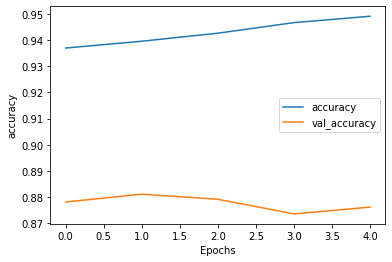

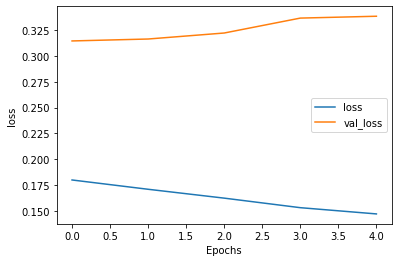

In [25]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')